### Plot waveforms

* top row the analog signal as a function of time
* bottom rows the digital signals: D0 = channel trigger, D1 = integration valid, D2 = baseline inhibit, D3 = channel triggered 
* for channel7 the digital signals are PKTRIG, FASTTRIG, VETO_RESET (needs to be fixed)

In [6]:
import sys,time
sys.path.insert(0,'python/')
import struct
import matplotlib.pyplot as plt
import numpy as np
# import data handling class
from DT5550_Waveform import *
from IPython import display

In [11]:
filename = '../../data/20211214_115511/waveform_20211214_115511_0.raw'
#filename = '../../DT5550_DAQ/daq/ReadoutClient/waveform.raw'

next event ......
(0, 1024)


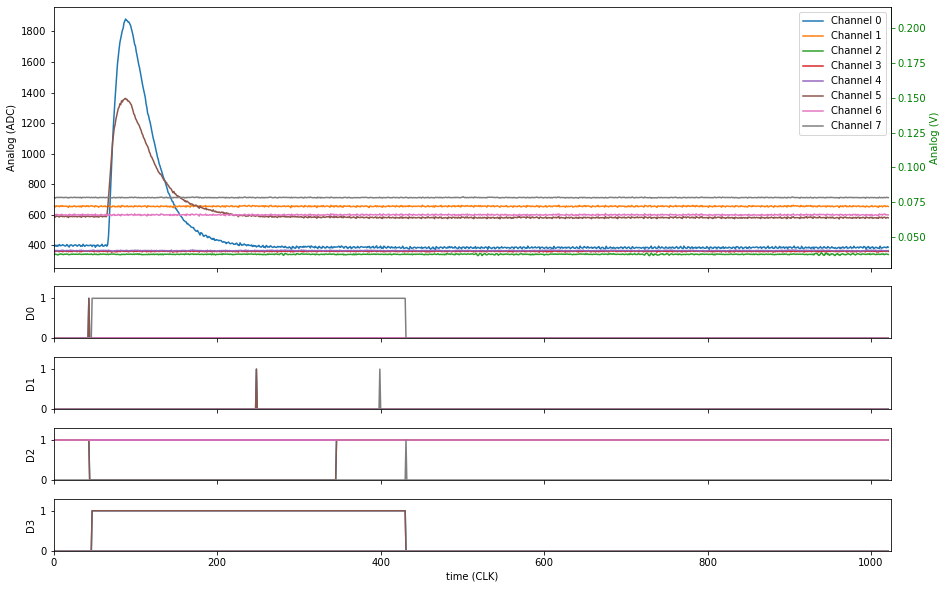

Type: 0 to continue, 1 to make pdf, 2 to quit....2


In [12]:
#
# open the datfile
#
print('Open datafile:',filename)
waves = DT5550_Waveform(file=filename)
while (waves.read_event() != -1):

    
    #
    # plot the waveform
    #
    fig = waves.plot_waveform(plot_range=(0,1024))    
    #
    # wait for input......
    #
    istat = int(input("Type: 0 to continue, 1 to make pdf, 2 to quit...."))

    if istat==0:
        print("continue......")
        display.clear_output(wait=True)
    elif istat==1:
        fname = 'event.pdf'
        print("save figure as:",fname)
        fig.savefig(fname)
        display.clear_output(wait=True)
    else:
        break

    print('next event ......')

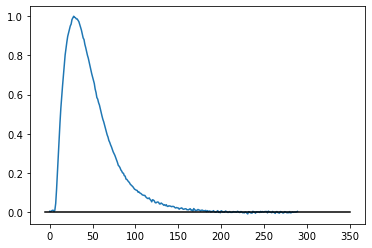

In [42]:
maxval = (waves.analog[0,60:350]-390).max()
template = (waves.analog[0,60:350]-390)/maxval

plt.plot(template)
plt.plot([-5,350],[0,0],color='black')
np.array(template).tofile('pulse_template.data')

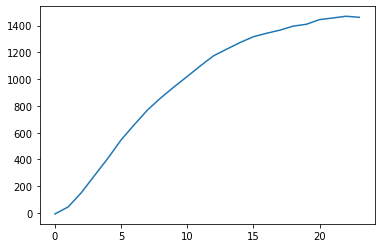

In [23]:
plt.plot(waves.analog[0,66:90]-411)